<a href="https://colab.research.google.com/github/AdamStamm/bootcamp_alura/blob/main/Notebooks/Adam_Stamm_Capdehourat_Mota_Projeto_M%C3%B3dulo_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá **Cientista**!

Bem vinda e bem vindo ao **projeto do Módulo 02**, neste desafio queremos que você aplique tudo que aprendeu no módulo 1 e 2, analisando dados do [programa de imunização nacional](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def), você pode analisar dados de **imunos** escolhidos por você, pode analisar toda a base de dados, apenas do seu estado ou de estados específicos. Pode analisar as taxas a cobertura ou doses calculadas, buscar outras fontes de informações fora do data SUS, como também, usar outros dados do DataSUS para enriquecer suas análises. 



Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.

**P.S: Vamos agendar um cafezinho para discutir o módulo 2, fique atento para os aviso no DISCORD**

E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook até dia 06/12 às 23h59 neste [formulário](https://forms.gle/HNR6yen2xB5ttv7D6).

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:
 
No Brasil onde mais de 50% da população acredita que as vacinas são importantes, seguras e eficazes, foi identificada uma possível queda nesses índices entre os períodos de 2015 a 2019, de acordo com o estudo global de [mapeamento de tendências globais na confiança de vacinas e investigação de barreiras para vacinação](https://www.thelancet.com/action/showPdf?pii=S0140-6736%2820%2931558-0), disponibilizado pela revista científica [Lancet](https://www.thelancet.com/).
 
A [Organização Mundial da Saúde](https://www.who.int/news-room/spotlight/ten-threats-to-global-health-in-2019) incluiu em 2019 a hesitação de vacinas num rol das 10 maiores ameaças a saúde mundial. Segundo a mesma, a vacinação evita de 2 a 3 milhões de mortes por ano e mais de 1,5 milhões podem ser evitadas caso a cobertura vacinal melhore, entretanto, o Sarampo apresentou um aumento de 30% no mundo e retornou em países que estavam proximos de eliminar a doença.
 
O Brasil é um dos países que tinha o Sarampo declarado erradicado em 2016 quando a OMS identificou que o país estava há um ano sem registro de casos, entretanto, em 2018 o país voltou a apresentar registros da doença.
 
O objetivo desse projeto é estudar o comportamento da cobertura vacinal, abandono e de casos de Sarampo no Brasil, afim de promover uma reflexão sobre o tema. Além disso esse projeto irá abordar a história e a importância das vacinas para a humanidade com finalidade informativa.

##Carregando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns

##Carregando conjuntos dos dados que serão analizados.

In [2]:
#Dados do tabnet
cobertura_imuno_por_ano = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A213015189_28_143_208-cobertura_imuno_por_ano.csv',
                                      encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
regiao_imuno2015 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A194826189_28_143_208_regiao_imuno_2015.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
regiao_imuno2016 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A194914189_28_143_208_regiao_imuno_2016.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
regiao_imuno2017 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A194951189_28_143_208_regiao_imuno_2017.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
regiao_imuno2018 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A195023189_28_143_208_regiao_imuno_2018.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
regiao_imuno2019 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A195052189_28_143_208_regiao_imuno_2019.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')


#dados transcritos do portal de arquivos de saúde.
casos_sarampo_regiao = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/casos_confirmados_sarampo_regiao.csv', sep=';')

#Dados extraídos do boletim epidemiologico de Outubro de 2020 do ministério da saúde.
boletim_out2020= '''ID UF Confirmados "Porcentagem de Confirmados" Óbitos "Porcentagem de Óbitos"
1 Pará 5.287 64,5 5 71,4
2 "Rio de Janeiro" 1.333 16,3 1 14,3
3 "São Paulo" 822 10,0 1 14,3
4 Paraná 377 4,6 0 0,0
5 "Santa Catarina" 110 1,3 0 0,0
6 Amapá 107 1,3 0 0,0
7 "Rio Grande do Sul" 37 0,5 0 0,0
8 Pernambuco 34 0,4 0 0,0
9 "Minas Gerais" 21 0,3 0 0,0
10 Maranhão 17 0,2 0 0,0
11 Goiás 8 0,1 0 0,0
12 Sergipe 8 0,1 0 0,0
13 Bahia 7 0,1 0 0,0
14 Ceará 7 0,1 0 0,0
15 "Mato Grosso do Sul" 7 0,1 0 0,0
16 Rondônia 6 0,1 0 0,0
17 "Distrito Federal" 5 0,1 0 0,0
18 Amazonas 4 0,0 0 0,0
19 Alagoas 3 0,0 0 0,0
20 "Mato Grosso" 1 0,0 0 0,0
21 Tocantins 1 0,0 0 0,0
Total 8.202 100,0 7 100,0'''

#Dados extraídos do boletim epidemiologico de Novembro de 2020 do ministério da saúde.
boletim_nov2020 = '''ID UF Confirmados "Porcentagem de Confirmados" Óbitos "Porcentagem de Óbitos"
1 Pará 5.327 64,5 5 71,4
2 "Rio de Janeiro" 1.340 16,2 1 14,3
3 "São Paulo" 825 10,0 1 14,3
4 Paraná 377 4,6 0 0,0
5 Amapá 115 1,4 0 0,0
6 "Santa Catarina" 110 1,3 0 0,0
7 "Rio Grande do Sul" 37 0,4 0 0,0
8 Pernambuco 34 0,4 0 0,0
9 "Minas Gerais" 21 0,3 0 0,0
10 Maranhão 17 0,2 0 0,0
11 "Mato Grosso do Sul" 8 0,1 0 0,0
12 Goiás 8 0,1 0 0,0
13 Sergipe 8 0,1 0 0,0
14 Bahia 7 0,1 0 0,0
15 Ceará 7 0,1 0 0,0
16 Rondônia 6 0,1 0 0,0
17 "Distrito Federal" 5 0,1 0 0,0
18 Amazonas 4 0,0 0 0,0
19 Alagoas 3 0,0 0 0,0
20 "Mato Grosso" 1 0,0 0 0,0
21 Tocantins 1 0,0 0 0,0
Total 8.261 100,0 7 100,0'''



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.

Informações sobre os dados:
- `cobertura_imuno_por_ano` foi retirado do [Programa de imunização nacional](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def)

- `casos_sarampo_regiao` foi retirado do [portal de arquivos da saúde](https://portalarquivos2.saude.gov.br/images/pdf/2018/abril/25/Casos-confirmados-sarampo.pdf) e precisou ser transcrito para o excel de forma manual pois o arquivo pdf continha um print de imagem da tabela, impossibilitando a extração por aqui.

- `boetim_out2020` e `boletim_nov2020` foram retirados dos [boletins epidemiológicos do ministério da saúde](https://www.gov.br/saude/pt-br/assuntos/boletins-epidemiologicos-1/)

In [3]:
casos_sarampo_regiao.head()

,regiao,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,norte,5396,4665,480,239,265,141,101,231,245,91,17,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,95
1,nordeste,13776,11364,2758,366,303,195,664,4547,607,369,0,0,0,0,0,0,57,0,0,0,57,2,1,210,866,211,0,0,0
2,sudeste,22202,10893,2635,1002,354,346,2083,45503,618,359,15,1,1,0,0,2,0,0,0,0,0,32,1,8,10,2,0,0,0
3,sul,6599,11140,1058,558,227,253,270,1770,1046,39,3,0,0,2,0,4,0,0,0,0,8,7,0,1,0,0,0,0,1
4,centro-oeste,13498,4470,766,231,113,37,208,1613,265,50,1,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0


In [4]:
cobertura_imuno_por_ano.head()

,Ano,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,1994,88.29,NaN,NaN,NaN,8.85,NaN,NaN,58.23,NaN,5.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.75,NaN,NaN,71.35,NaN,NaN,NaN,49.46
1,1995,103.62,NaN,NaN,NaN,10.50,NaN,NaN,77.82,NaN,4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.53,NaN,NaN,86.85,0.00,NaN,NaN,52.02
2,1996,104.19,NaN,NaN,NaN,16.50,NaN,NaN,80.85,NaN,5.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.24,NaN,NaN,80.39,0.01,NaN,NaN,52.26
3,1997,117.12,NaN,NaN,NaN,5.79,NaN,NaN,89.27,NaN,7.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.50,NaN,NaN,108.61,0.03,NaN,NaN,58.17
4,1998,111.61,NaN,NaN,NaN,12.63,NaN,NaN,95.30,NaN,18.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.97,NaN,NaN,95.26,0.84,NaN,NaN,61.01


In [5]:
boletim_out2020_io = StringIO(boletim_out2020)
sarampo_out2020 = pd.read_csv(boletim_out2020_io,encoding='ISO-8859-1', sep=' ', decimal=',')
sarampo_out2020['Óbitos'] = sarampo_out2020['Óbitos'].astype(int)
sarampo_out2020.head()

,ID,UF,Confirmados,Porcentagem de Confirmados,Óbitos,Porcentagem de Óbitos
0,1,Pará,5.287,64.5,5,71.4
1,2,Rio de Janeiro,1.333,16.3,1,14.3
2,3,São Paulo,822,10.0,1,14.3
3,4,Paraná,377,4.6,0,0.0
4,5,Santa Catarina,110,1.3,0,0.0


In [6]:
boletim_nov2020_io = StringIO(boletim_nov2020)
sarampo_nov2020 = pd.read_csv(boletim_nov2020_io,encoding='ISO-8859-1', sep=' ',decimal=',')
sarampo_nov2020['Óbitos'] = sarampo_nov2020['Óbitos'].astype(int)
sarampo_nov2020.head()

,ID,UF,Confirmados,Porcentagem de Confirmados,Óbitos,Porcentagem de Óbitos
0,1,Pará,5.327,64.5,5,71.4
1,2,Rio de Janeiro,1.340,16.2,1,14.3
2,3,São Paulo,825,10.0,1,14.3
3,4,Paraná,377,4.6,0,0.0
4,5,Amapá,115,1.4,0,0.0


##Fontes:

[Lancet](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)31558-0/fulltext)

[Tabnet](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def)

[Boletim epidemiologico agosto 2020](https://antigo.saude.gov.br/images/pdf/2020/August/31/Boletim-epidemiologico-SVS-34.pdf)

[Boletim epidemiologico novembro 2020](https://www.gov.br/saude/pt-br/media/pdf/2020/novembro/03/boletim_epidemiologico_svs_43.pdf)

[Organização Mundial da Saúde](https://www.who.int)

[Data World Bank](https://data.worldbank.org/) 

[Casos de Sarampo no Brasil](https://portalarquivos2.saude.gov.br/images/pdf/2018/abril/25/Casos-confirmados-sarampo.pdf)

Todos os dados foram disponibilizados em meu próprio [github](http://github.com/AdamStamm/bootcamp_alura)


#Vacinas: Uma história a ser contada:

*A ciência não tem pátria*, Louis Pasteur.

Hoje em dia não é difícil imaginar o quão perigoso é um mundo sem vacinas, afinal estamos em pleno combate ao coronavirus (Sars-CoV-2), agora imagine o quão perigoso era o mundo **sem nenhuma vacina**.

O surgimento das vacinas se deu em um momento histórico de combate a varíola, uma das doenças mais temidas no mundo no século XVIII, com uma taxa de mortalidade em torno de 10% a 40%. ([https://www.centralnacionalunimed.com.br/](https://www.centralnacionalunimed.com.br/documents/2520476/2523487/folder_cobertura_vacinal__alta+sem+marca.pdf/c18e23e3-0c27-4d09-87f8-b81bd5bd9474)).

De forma rudimentar, a **China**, foi possívelmente o primeiro país a descobrir uma "forma" de vacinação, na realidade, chamada de *variolação*. O método tratava de introduzir na pele de pessoas saudáveis um líquido extraído  de crostas de varíola de um paciente infectado. Esse método foi levado para a Europa Ocidental, onde então, apesar de vários casos de óbitos relacionados a varíola, começou a ser utilizado na Inglaterra e nos Estados Unidos. [(FEIJÓ & SÁFADI, 2006)](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0021-75572006000400001)

Em 1798, o médico britânico Edward Jenner, publicou suas primeiras investigações sobre o tema no trabalho *Variloae Vaccinae*. Ele observou que camponeses desenvolviam uma certa imunidade conhecida por *vacinnia*, devido ao contato com vacas infectadas com varíola bovina *(cow pox)*, isso possibilitou que as primeiras técnicas de imunização fossem desenvolvidas, isso possibilitou que, mais tarde em 1870, Louis Pasteur, químico e cientista francês, e Robert Koch, médico, patologista e bacteriologista alemão, estabelecessem a relação de causa-efeito entre a presença de microorganismo patogênicos e doenças. A fim de homenagear Jenner, Pasteur deu o nome de vacina. [(FEIJÓ & SÁFADI,2006)](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0021-75572006000400001)

Em 1885, Pasteur desenvolve a vacina contra a raiva humana.

<center>
<img src='https://exame.com/wp-content/uploads/2019/09/gettyimages-157204335.gif?quality=70&strip=info&resize=680,453'>
</center>

##Vacinas: O que são?

Produzidas com bactérias, vírus, e até mesmo com partes deles (fragmentadas), atenuados ou inativados(enfraquecidos), também pode ser produzida por uma substância química semelhante a um agente infeccioso. A vacina é reconhecida pelo sistema imunológico do individuo que a recebeu produzindo uma resposta que o protege da doença. A vacina, portanto, tem a finalidade de induzir o sistema imunologico do ser humano a reagir como se realmente tivesse sido infectado. [(VERMELHO, 2011)](http://redeglobo.globo.com/globociencia/noticia/2011/11/artigo-louis-pasteur-foi-determinante-para-criacao-das-primeiras-vacinas.html)

Além das formas de vacinas acima, e desde 1796 quando Edward Jenner inoculou um garoto de oito anos com a varíola bovina criando a primeira vacina, hoje, durante a pandemia de Covid está ocorrendo uma revolução na forma de produção das vacinas, com vacinas feitas por mRNA, ou RNA mensageiro. [(CARDOSO, 2020)](https://tecnoblog.net/meiobit/432695/como-funciona-a-vacina-de-mrna-a-mais-promissora-contra-o-covid-19/)

*“Estamos diante de fatos inusitados e uma experiência nova, extraordinária. Em nossos melhores sonhos, seria impossível imaginar que, do ponto de vista de vacinas, conseguiríamos andar tão rápido e ir tão longe"* [(FORATO, 2020)](https://canaltech.com.br/saude/vacinas-de-mrna-contra-covid-o-que-sao-e-por-que-vao-revolucionar-a-ciencia-174922/)

O DNA é uma molécula que armazena todas as nossas informações genéticas, inclusive, sobre como as células devem produzir proteínas, o mRNA, é responsável por copiar parte desse código genético e traduzi-lo nessas proteínas. "Ele é um instrumento que a célula tem para pegar um determinado código genético e enviar para estrutura que produz novas proteínas. Então, esse mensageiro diz: ‘Produza proteínas deste modo’". [(FORATO, 2020)](https://canaltech.com.br/saude/vacinas-de-mrna-contra-covid-o-que-sao-e-por-que-vao-revolucionar-a-ciencia-174922/), ou seja, no lugar de injetar um patógeno inteiro ou partes deste no corpo de um paciente, essas vacinas injetam um trecho do código genético do vírus do qual contém as instruções para produzir uma proteína que seja reconhecível pelo nosso sistema imunológico, na prática, no lugar de injetar a proteína pronta, essas vacinas injetam a "receita" para que elas sejam produzidas *pelo nosso próprio organismo*. [(CARBINATTO, 2020)](https://super.abril.com.br/saude/como-funcionam-4-vacinas-que-estao-sendo-testadas-contra-o-coronavirus/).

<center>
<img src="https://www.news-medical.net/image.axd?picture=2018%2f11%2fBy_Designua.jpg&ts=20181112091027&ri=673">
</center>




#A história do Sarampo no Brasil:

Em 1968, o sarampo, passou a ser uma doença de notificação compulsória. Causa de morbidades e mortalidades infantis, principalmente em menores de 1 ano, a doença causava epidemias a cada 2 ou 3 anos, mesmo com a vacina tendo sido introduzida em 1960, sua utilização pública foi o resultado de alguns governos estaduais que importavam a vacina no mercado internacional, entretanto, de modo descontínuo. 

O Programa Nacional de Imunizações - PNI, criado em 1973 com o objetivo de organizar, implementar e avaliar as ações de imunização em todo o país. No mesmo ano e no ano seguinte foram realizadas campanhas de vacinação em áreas urbanas de diversos estados, essa forma de atuação logo foi substituida pela valorização dos serviços de rotina e expansão dos serviços básicos de saúde.

Na década de 80, por dificuldades em se estabelecer as coberturas vacinais mínimas para o controle de doenças, foram realizadas campanhas em locais ondem existia uma baixa cobertura.

1986 foi o ano em que ocorreu a maior epidemia da década, sendo notificados 129.942 casos, o que representou uma incidência de sarampo de 97.7 a cada 100.000 habitantes. [(DOMINGUES et.al., 1997)](http://scielo.iec.gov.br/scielo.php?script=sci_arttext&pid=S0104-16731997000100002#:~:text=O%20sarampo%20passou%20a%20ser,ou%203%20anos2%2C3.)

Experiências adquiridas em campanhas mundiais de erradicação da Varíola e do Poliovírus Selvagem Autócne nas Américas, motivaram a aplicação de estratégias de controle e de vigilância epidemiológica das doenças evitáveis por imunização. Além disso, ocorreram algumas campanhas bem sucedidas de controle e até mesmo de eliminação do sarampo em locais como Cuba, Caribe e no próprio estado de São Paulo, o que evidenciou a possibilidade de controle e eliminação desse. 

Em 1992, visando atingir essa meta, o Brasil definiu a extinção da doença como prioridade, estabelecendo o Plano Nacional de Eliminação do Sarampo que tinha algumas estratégias a seguir:

- Vacinação da população entre 9 meses e 14 anos de idade, independente do histórico de vacinação e de doença.

- Manutenção de, no mínimo, 95% de cobertura vacinal para os menores de 1 ano de idade.

- Campanhas de *"follow-up"* entre 3 e 5 anos.

- Vigilância epidemiológica intensiva para os casos de suspeita.

- Diagnóstico laboratorial etiológico de todo caso suspeito notificado.

- Capacitação de pessoal para o desenvolvimento das atividades do plano em nível nacional.

- Campanhas de divulgação, com a finalidade de sensibilizar a população em geral além da classe política e dos profissionais de saúde.

O impacto dessas ações foi imediato, com o país obtendo uma redução de 81% no número de casos, contabilizados nos anos de 1991 e 1992, entretanto, após esses anos apenas 32% dos municípios brasileiros, em média, conseguiram atingir a cobertura satisfatória para controle de sarampo entre os menores de 1 ano de idade. Portanto, o segundo ponto da estratégia não estava tendo êxito.

Nos anos seguintes, apesar da cobertura vacinal de igual ou maior de 95% estar sendo atingida na maioria do país, aconteceu uma importante diminuição no número de casos confirmados por sarampo, e por consequência, na letalidade.

Em setembro de 1994, durante a solenidade de entrega do certificado de erradicação da Poliomelite nas Américas, foi decidido definir uma meta para eliminação do sarampo no hemisfério ocidental até o ano de 2000, o Ministério da Saúde brasileiro também assumiu essa meta.[(DOMINGUES et.al., 1997)](http://scielo.iec.gov.br/scielo.php?script=sci_arttext&pid=S0104-16731997000100002#:~:text=O%20sarampo%20passou%20a%20ser,ou%203%20anos2%2C3.)

O último caso autócne de Sarampo no país foi confirmado em 2000 e em 2008 foi realizada uma megaoperação contra a rubéola onde foi criada uma comissão para acompanhar a eliminação do sarampo e da rubéola. [(DOMINGUES, 2013)](http://www.blog.saude.gov.br/index.php/servicos/32998-decadas-de-1990-e-2000-reforcam-sucesso-do-programa-nacional-de-imunizacoes)

Em 2015 foi registrado um último caso de Sarampo no Brasil, o que fez com que o país recebesse em 2016, pela Organização Pan-Americana de saúde, o certificado de eliminação do sarampo, infelizmente, isso durou pouco tempo, em 2018 o país voltou a registrar casos da doença o que fez com que o país perdesse o certificado em fevereiro de 2019. [(MENEZES, 2019)](https://www.aosfatos.org/noticias/desenhamos-fatos-sobre-o-surto-de-sarampo-no-brasil/)






Abaixo temos a tabela de casos de sarampo registrados de 1990 a 2018

In [7]:
casos_sarampo_regiao

,regiao,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,norte,5396,4665,480,239,265,141,101,231,245,91,17,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,95
1,nordeste,13776,11364,2758,366,303,195,664,4547,607,369,0,0,0,0,0,0,57,0,0,0,57,2,1,210,866,211,0,0,0
2,sudeste,22202,10893,2635,1002,354,346,2083,45503,618,359,15,1,1,0,0,2,0,0,0,0,0,32,1,8,10,2,0,0,0
3,sul,6599,11140,1058,558,227,253,270,1770,1046,39,3,0,0,2,0,4,0,0,0,0,8,7,0,1,0,0,0,0,1
4,centro-oeste,13498,4470,766,231,113,37,208,1613,265,50,1,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0


In [8]:
casos = casos_sarampo_regiao.set_index('regiao')

Text(0, 0.5, 'Casos')

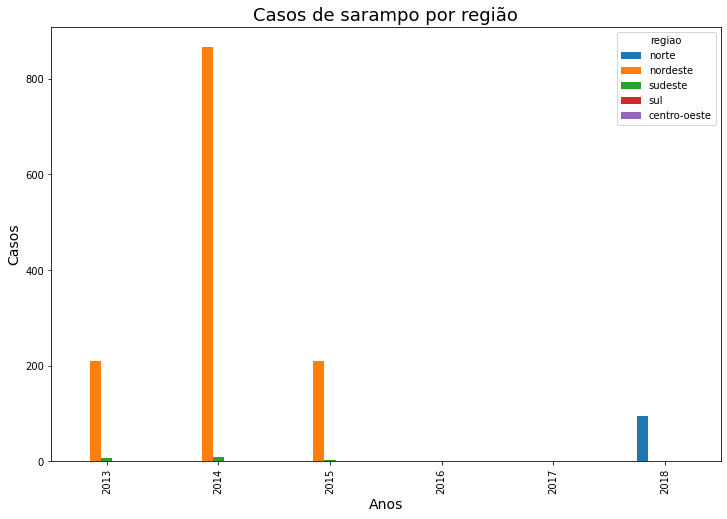

In [9]:
casos_2013_2018 = casos.T.loc['2013':]
casos_2013_2018.plot(kind='bar',figsize=(12,8))
plt.title('Casos de sarampo por região', fontsize=18)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Casos', fontsize=14)

É possível notar o retorno do sarampo na região norte através do gráfico acima.

##O retorno do Sarampo:

Infelizmente, o sarampo esta de volta, ao final de 2018 o Brasil registrou 10262 casos de Sarampo[(MINISTERIO DA SAUDE,2018)](https://portalarquivos2.saude.gov.br/images/pdf/2018/dezembro/14/Informe-Sarampo-n34-12dez18.pdf). Números expressivos em vista do histório da doença observado anteriormente.

Uma das causas para o retorno do sarampo, após dois anos consecutivos sem registros de casos, foi a "importação" do vírus, ou seja, brasileiros que viajaram para países onde se tinha a circulação da doença ou quando um estrangeiro vindo de um desses locais visitava o país. [(MENEZES,2019)](https://www.aosfatos.org/noticias/desenhamos-fatos-sobre-o-surto-de-sarampo-no-brasil/)

Segundo o Ministério da Saúde, o surto de sarampo em 2018, predominante no norte do país, estavam relacionados com um genótipo do virus da Venezuela. [(LABOISSIÈRE,2019)](https://agenciabrasil.ebc.com.br/saude/noticia/2019-01/brasil-tem-10274-casos-confirmados-de-sarampo)

Já em 2019 a [Prefeitura de São Paulo](https://www.prefeitura.sp.gov.br/cidade/secretarias/justica/noticias/?p=280566) informou que os casos na cidade foram importados da Noruega, Malta e Israel.

Outro fator que deve ser verificado é a **cobertura vacinal da doença**. Por isso vamos aos dados.



<center>
<img src='https://www.scielo.br/img/revistas/hcsm/v10s2/a13img05.gif'>
</center>

#Dados de cobertura vacinal

##Limpeza dos dados

In [10]:
cobertura_imuno_por_ano[['Ano','021 Tríplice Viral  D1','098 Tríplice Viral  D2','018 Sarampo']]

,Ano,021 Tríplice Viral D1,098 Tríplice Viral D2,018 Sarampo
0,1994,NaN,NaN,71.35
1,1995,NaN,NaN,86.85
2,1996,NaN,NaN,80.39
3,1997,NaN,NaN,108.61
4,1998,NaN,NaN,95.26
5,1999,6692.10,NaN,99.31
6,2000,77.50,NaN,105.35
7,2001,88.43,NaN,103.85
8,2002,96.92,NaN,96.02
9,2003,112.95,NaN,4.06


É possível observar que temos dados de vacinação de Sarampo de 1994 a 2002 pois a partir de 2003 a vacina contra o sarampo foi substituída pela vacina Tríplice Viral SCR(Sarampo / Caxumba / Rubéola) segundo a [página 4 das notas técnicas do Tabnet](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf). Já os dados da segunda dose da tríplice viral estão disponíveis apenas a partir de 2013. Considerando que dados de 1994 a 1996 não possuem boa precisão pela própria implantação do banco de dados e que os dados de 2019 estão incompletos vou optar por realizar a análise de 2013 a 2018.

In [11]:
#Selecionando as linhas de 2013 em diante.
cobertura_sarampo_ano = cobertura_imuno_por_ano[['Ano','021 Tríplice Viral  D1',
                                                 '098 Tríplice Viral  D2']][19:]
#Setando o ano como índice
cobertura_sarampo_ano = cobertura_sarampo_ano.set_index('Ano')
#Renomeando colunas
cobertura_sarampo_ano = cobertura_sarampo_ano.rename(columns={'021 Tríplice Viral  D1': 'triplice_viral_1,', 
                                                              '098 Tríplice Viral  D2': 'triplice_viral_2'})
#Excluindo as linhas Total e 2019
cobertura_sarampo_ano = cobertura_sarampo_ano.drop(['Total','2019'], axis=0)
cobertura_sarampo_ano.head(10)

,"triplice_viral_1,",triplice_viral_2
Ano,,
2013,107.46,68.87
2014,112.80,92.88
2015,96.07,79.94
2016,95.41,76.71
2017,90.85,76.45
2018,91.89,76.49


Fazendo um plot superficial apenas para verificar se já temos uma ideia do comportamento dos dados

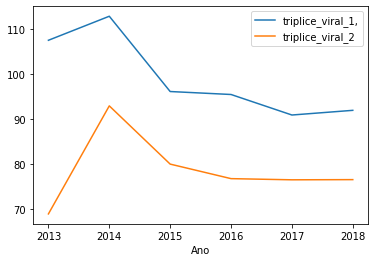

In [12]:
cobertura_sarampo_ano.plot()

Como vemos, apesar de ser uma análise inicial, esse gráfico já nos tráz preocupações, é possível notar uma grande queda na cobertura vacinal a partir de 2014, além disso, é notável o fato da segunda dose ter uma adesão muito baixa.

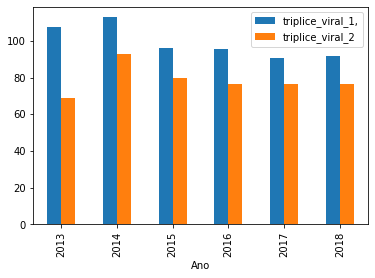

In [13]:
cobertura_sarampo_ano.plot(kind='bar')

Mais preocupante ainda é notar que a primeira dose está e descrescimento quase pareando com os índices da segunda.

Na extração de dados do tabnet a seleção de região por ano realiza uma soma da cobertura vacinal, dessa forma, fiz uma seleção dos dados de 2015 a 2019 e uma extração específica para cada ano, assim poderemos observar de uma melhor forma esses dados, para isso serão feitas algumas limpezas desses dados.

In [14]:
colunas = ['Região', '021 Tríplice Viral  D1', '098 Tríplice Viral  D2']
dados = [regiao_imuno2015,regiao_imuno2016,regiao_imuno2017,
         regiao_imuno2018,regiao_imuno2019]

In [15]:
#criando uma função para automatizar a limpeza dos dados
def limpa_dados(dados):
  dados = dados[colunas]
  dados = dados.set_index('Região')
  dados = dados.drop('Total')

  return dados

In [16]:
regiao_imuno2015 = limpa_dados(regiao_imuno2015)
regiao_imuno2016 = limpa_dados(regiao_imuno2016)
regiao_imuno2017 = limpa_dados(regiao_imuno2017)
regiao_imuno2018 = limpa_dados(regiao_imuno2018)
regiao_imuno2019 = limpa_dados(regiao_imuno2019)

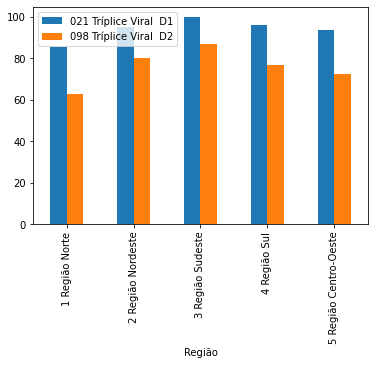

In [17]:
regiao_imuno2015.plot(kind='bar')